<a href="https://colab.research.google.com/github/BarryDeCicco/Synthetic_Data/blob/main/Experiments_with_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages:

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# prompt: install package 'ydata-sdk' from 'https://pypi.org/'

!pip install ydata-sdk



# Getting Original Data Set from Kaggle:

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasad22/healthcare-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/prasad22/healthcare-dataset/versions/2


In [2]:
# prompt: list data sets at /root/.cache/kagglehub/datasets/prasad22/healthcare-dataset/versions/2

import os
dataset_path = "/root/.cache/kagglehub/datasets/prasad22/healthcare-dataset/versions/2"

if os.path.exists(dataset_path):
    for filename in os.listdir(dataset_path):
        print(filename)
else:
    print(f"The directory '{dataset_path}' does not exist.")


healthcare_dataset.csv


In [3]:
# prompt: import /root/.cache/kagglehub/datasets/prasad22/healthcare-dataset/versions/2healthcare_dataset.csv as df_original

import pandas as pd
import os

dataset_path = "/root/.cache/kagglehub/datasets/prasad22/healthcare-dataset/versions/2"

# Check if the file exists before attempting to read it
csv_filepath = os.path.join(dataset_path, "healthcare_dataset.csv")

if os.path.exists(csv_filepath):
    try:
        df_original = pd.read_csv(csv_filepath)
        print("Successfully imported the CSV file as df_original.")
    except pd.errors.ParserError as e:
        print(f"Error parsing the CSV file: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
else:
    print(f"The file '{csv_filepath}' does not exist.")


Successfully imported the CSV file as df_original.


# Examine Original Data Set:
(using YData SDK)

In [11]:
type(df_original)

pandas.core.frame.DataFrame

In [12]:

import pandas as pd

if 'df_original' in locals():
  try:
    rows = len(df_original)
    cols = len(df_original.columns)
    print("Number of rows:", rows)
    print("Number of columns:", cols)
  except Exception as e:
    print(f"An error occurred: {e}")
else:
  print("df_original is not defined. Please ensure the CSV file is read successfully.")



Number of rows: 55500
Number of columns: 15


In [15]:
df_original.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


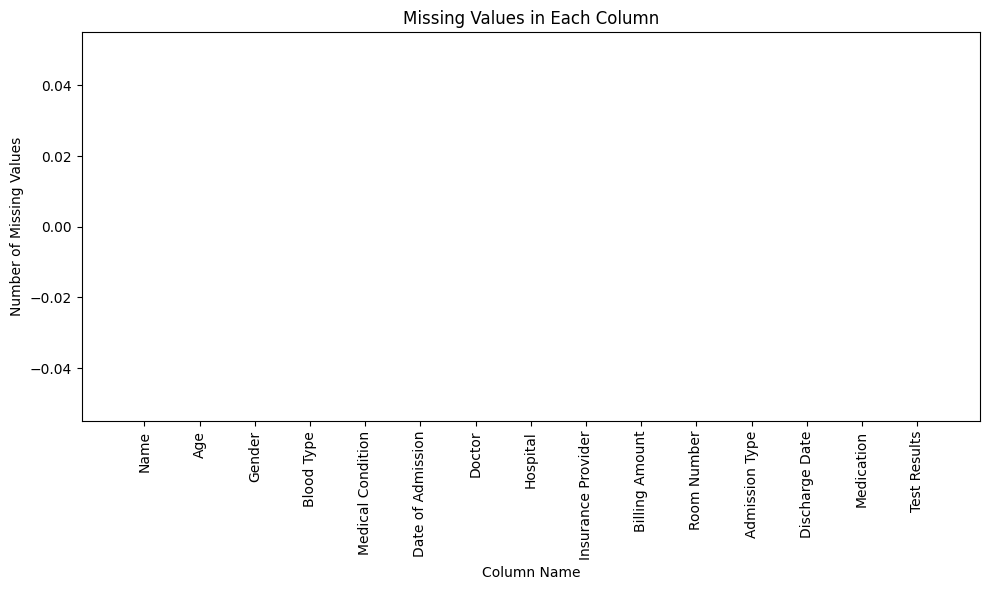

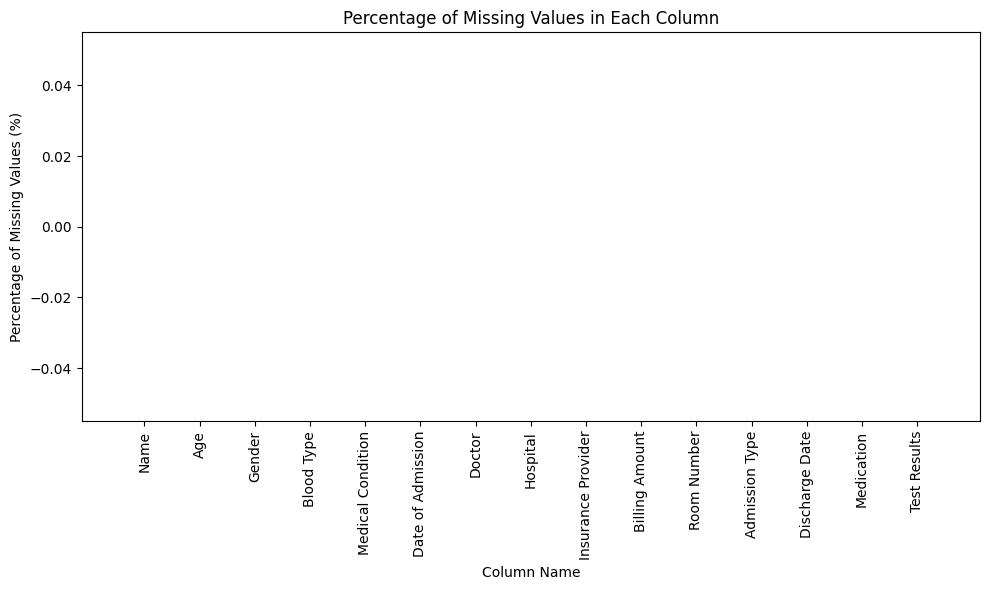

In [17]:
# prompt: Using dataframe df_original: plot of missing values counts and percentages

import matplotlib.pyplot as plt
import pandas as pd

# Calculate missing values
missing_values = df_original.isnull().sum()
missing_percentages = (missing_values / len(df_original)) * 100

# Create a DataFrame for plotting
missing_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values, 'Percentage': missing_percentages.values})

# Plotting the missing values
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.bar(missing_df['Column'], missing_df['Missing Values'])
plt.xticks(rotation=90)
plt.ylabel('Number of Missing Values')
plt.xlabel('Column Name')
plt.title('Missing Values in Each Column')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# Plotting missing value percentages
plt.figure(figsize=(10, 6))
plt.bar(missing_df['Column'], missing_df['Percentage'])
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values (%)')
plt.xlabel('Column Name')
plt.title('Percentage of Missing Values in Each Column')
plt.tight_layout()
plt.show()


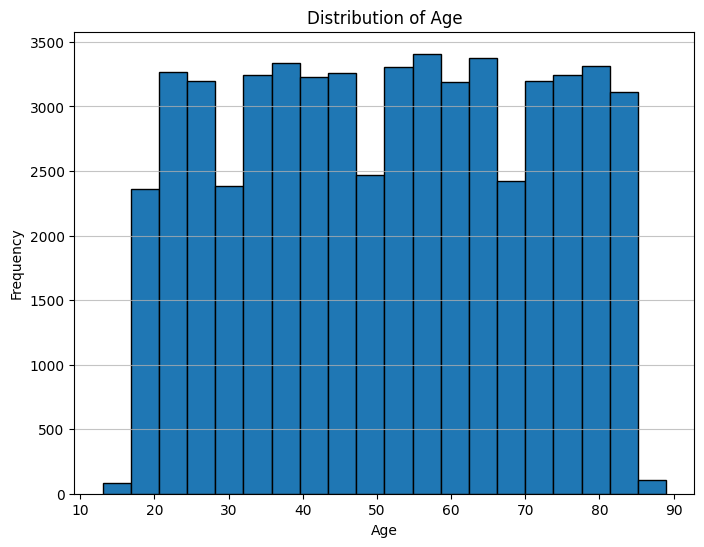

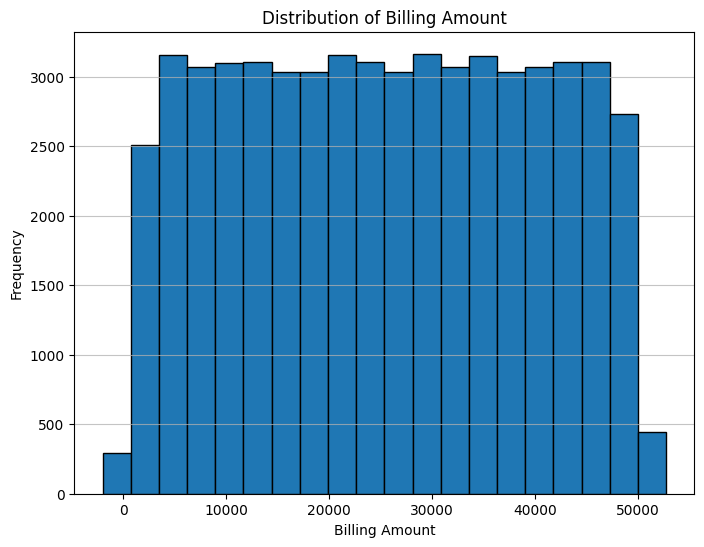

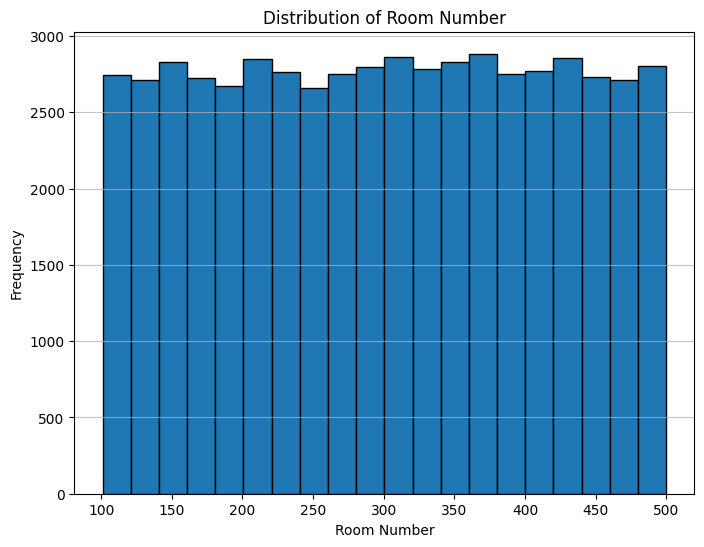

In [16]:
# prompt: Using dataframe df_original: Distribution of all numeric variables

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_original' is your DataFrame

# Select only numeric columns
numeric_cols = df_original.select_dtypes(include=['number'])


# Loop through each numeric column and create a histogram
for col in numeric_cols.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.hist(df_original[col], bins=20, edgecolor='black') # Adjust number of bins as needed
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
